In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.layers.experimental import preprocessing
import time
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('Molecular-data.csv')
data.head()

,Molar volume,Density
0,26.379294,5.254
1,25.847969,5.362
2,26.510484,5.228
3,25.737570,5.385
4,25.402642,5.456


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Molar volume  50 non-null     float64
 1   Density       50 non-null     float64
dtypes: float64(2)
memory usage: 928.0 bytes


In [4]:
data.describe()

,Molar volume,Density
count,50.000000,50.000000
mean,26.703613,5.386080
std,1.331481,0.267123
min,22.778641,4.609000
25%,25.975829,5.258000
50%,26.553503,5.373500
75%,27.372057,5.488750
max,30.605477,6.409000


In [5]:
mv = data['Molar volume']
density = data['Density']

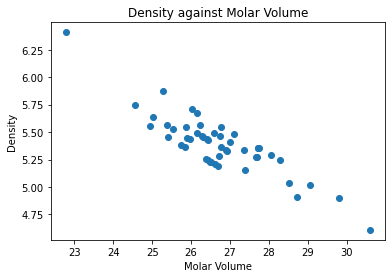

In [6]:
plt.scatter(mv, density)
plt.title('Density against Molar Volume')
plt.xlabel('Molar Volume')
plt.ylabel('Density')
plt.show()

From the scattering above, we can noticed that the higher the molar volume, the smaller the density value. Although the relationship can be observed through this plotting, we still need a model to make prediction on density according to the feature, in this case, molar volume is the only feature input.

In [9]:
input_X = data['Molar volume'].values
input_X

array([26.37929429, 25.84796945, 26.51048435, 25.73756958, 25.40264153,
       24.93196838, 26.61229113, 26.69430127, 26.43463899, 26.49528048,
       25.3706195 , 25.01962476, 25.90645444, 30.6054772 , 25.53596025,
       24.55791163, 28.71171268, 26.72615468, 25.96367465, 27.37978346,
       26.42689681, 26.28653418, 26.30580583, 26.15241921, 26.92766916,
       25.87891753, 26.77195982, 26.89235087, 26.4074474 , 28.52235227,
       26.73778549, 29.06975484, 26.59652192, 27.70176638, 22.77864079,
       27.67026323, 27.34887763, 27.00486659, 29.81178452, 26.2238744 ,
       26.01229035, 27.7118053 , 27.09475105, 25.2856653 , 28.06278658,
       27.72733302, 28.27659829, 26.15435888, 27.73769451, 26.77708171])

In [11]:
actual_Y = data['Density'].values
actual_Y

array([5.254, 5.362, 5.228, 5.385, 5.456, 5.559, 5.208, 5.192, 5.243,
       5.231, 5.56 , 5.638, 5.445, 4.609, 5.524, 5.744, 4.913, 5.278,
       5.433, 5.152, 5.431, 5.46 , 5.456, 5.488, 5.33 , 5.546, 5.361,
       5.337, 5.435, 5.032, 5.46 , 5.022, 5.489, 5.27 , 6.409, 5.276,
       5.338, 5.406, 4.897, 5.567, 5.707, 5.357, 5.479, 5.871, 5.29 ,
       5.354, 5.25 , 5.676, 5.352, 5.544])

In [12]:
train_features, test_features, train_labels, test_labels = train_test_split(input_X, actual_Y, test_size=0.2)
print('Shape of train_features is', train_features.shape)
print('Shape of test_features is', test_features.shape)
print('Shape of train_labels is', train_labels.shape)
print('Shape of test_labels is', test_labels.shape)

Shape of train_features is (40,)
Shape of test_features is (10,)
Shape of train_labels is (40,)
Shape of test_labels is (10,)


In [13]:
train_X = train_features.reshape([train_features.shape[0],1])
test_x = test_features.reshape([test_features.shape[0],1])
train_Y = train_labels.reshape([train_labels.shape[0],1])
test_y = test_labels.reshape([test_labels.shape[0],1])
print('Shape of train_X is', train_X.shape)
print('Shape of test_x is', test_x.shape)
print('Shape of train_Y is', train_Y.shape)
print('Shape of test_y is', test_y.shape)

Shape of train_X is (40, 1)
Shape of test_x is (10, 1)
Shape of train_Y is (40, 1)
Shape of test_y is (10, 1)


In [14]:
X = tf.constant(train_X, dtype=tf.float32)
Y = tf.constant(train_Y, dtype=tf.float32) 
                                                          
test_X = tf.constant(test_x, dtype=tf.float32) 
test_Y = tf.constant(test_y, dtype=tf.float32)

m = tf.Variable(1., shape=tf.TensorShape(None))
b = tf.Variable(1)

In [15]:
def mean_squared_error(Y , y_pred):
    return tf.reduce_mean(tf.square(Y - y_pred))

def mean_squared_error_deriv(Y , y_pred):
    return tf.reduce_mean((y_pred - Y))
    
def predict(x, m, b):
    return np.dot(x, m) + b

In [18]:
num_epochs = 1000000
num_samples = X.shape[0]
batch_size = 25
learning_rate = 0.001

dataset = tf.data.Dataset.from_tensor_slices((X , Y)) 
dataset = dataset.repeat(num_epochs).batch(batch_size)
iterator = dataset.__iter__()

num_features = X.shape[1]
weights = tf.random.normal((num_features , 1)) 
bias = 0.000

epochs_plot = []
loss_plot = []

# time the computation
start_time = time.time()

for i in range(num_epochs):
    
    dJ_dB = 0
    dJ_dW = 0
    epoch_loss = []
    for b in range(int(num_samples/batch_size)):
        x_batch , y_batch = iterator.get_next()
   
        output = predict(x_batch , weights , bias) 
        loss = (y_batch - output)
        epoch_loss.append(loss)
    
        dJ_dB += -(2/num_features) * loss
        dJ_dW += -(2/num_features) * x_batch * loss
        # dJ_dW = tf.reduce_mean(dJ_dH * dH_dW)
        # dJ_dB = tf.reduce_mean(dJ_dH)
    
    weights = weights - (learning_rate * dJ_dW)
    bias = bias - (learning_rate * dJ_dB) 
        
    loss = np.array(epoch_loss).mean()
    epochs_plot.append(i + 1)
    loss_plot.append(loss) 
    
    if i % 10000 == 0:
      print('Epoch: {}, Training loss: {}'.format(i, loss))

print("\n--- %s seconds ---" % (time.time() - start_time)) 

Epoch: 0, Training loss: 17.035839080810547
Epoch: 10000, Training loss: -0.34025856852531433
Epoch: 20000, Training loss: -0.31626129150390625
Epoch: 30000, Training loss: -0.29473617672920227
Epoch: 40000, Training loss: -0.2754078209400177
Epoch: 50000, Training loss: -0.25803250074386597
Epoch: 60000, Training loss: -0.24239397048950195
Epoch: 70000, Training loss: -0.2283017933368683
Epoch: 80000, Training loss: -0.21558675169944763
Epoch: 90000, Training loss: -0.2040978968143463
Epoch: 100000, Training loss: -0.1937028169631958
Epoch: 110000, Training loss: -0.1842840164899826
Epoch: 120000, Training loss: -0.17573609948158264
Epoch: 130000, Training loss: -0.1679670214653015
Epoch: 140000, Training loss: -0.16089420020580292
Epoch: 150000, Training loss: -0.15444409847259521
Epoch: 160000, Training loss: -0.14855264127254486
Epoch: 170000, Training loss: -0.14316216111183167
Epoch: 180000, Training loss: -0.13822005689144135
Epoch: 190000, Training loss: -0.13368211686611176
Ep

Although given 100000 iteration learning, it did not converge nicely, we may try normalized the data on next section.

In [23]:
pred_Y = np.dot(test_X, np.mean(weights)) + np.mean(bias)
pred_Y

array([[5.434125 ],
       [5.324321 ],
       [5.5385303],
       [5.4831915],
       [5.449092 ],
       [5.2905736],
       [5.4669123],
       [5.2827396],
       [5.2857475],
       [5.4666867]], dtype=float32)

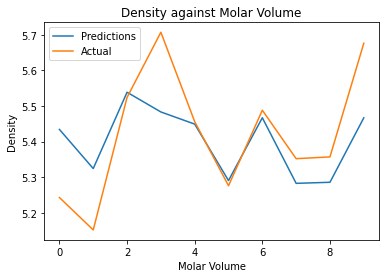

In [24]:
plt.plot(pred_Y, label='Predictions')
plt.plot(test_Y, label='Actual')
plt.title('Density against Molar Volume')
plt.xlabel('Molar Volume')
plt.ylabel('Density')
plt.legend()
plt.show()

In [28]:
x = input_X.reshape(-1,1).astype(np.float32)
pred_all = predict(x, np.mean(weights) , np.mean(bias))
pred_all[:10]

array([[5.4405546],
       [5.502282 ],
       [5.425313 ],
       [5.515108 ],
       [5.554019 ],
       [5.6087003],
       [5.4134855],
       [5.403958 ],
       [5.434125 ],
       [5.427079 ]], dtype=float32)

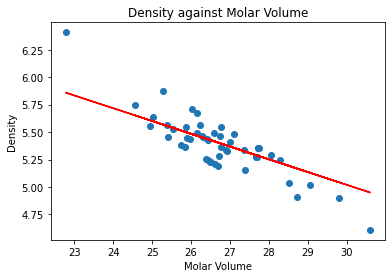

In [29]:
plt.scatter(mv, density)
plt.plot(mv, pred_all,'r-')
plt.title('Density against Molar Volume')
plt.xlabel('Molar Volume')
plt.ylabel('Density')
plt.show()

In [30]:
weights.numpy()

array([[-0.15726392],
       [ 0.0280378 ],
       [-0.12846082],
       [-0.14188197],
       [-0.19759263],
       [-0.17389612],
       [ 0.01921176],
       [-0.12720823],
       [-0.12805197],
       [-0.20518944],
       [-0.15991879],
       [ 0.03982214],
       [-0.12494412],
       [-0.12540406],
       [-0.2102755 ],
       [-0.17360039],
       [ 0.03938672],
       [-0.12535775],
       [-0.10882474],
       [-0.19710152],
       [-0.1580566 ],
       [ 0.04427461],
       [-0.12679383],
       [-0.11524052],
       [-0.19009387]], dtype=float32)

In [31]:
bias.numpy()

array([[ 9.723589 ],
       [ 4.562992 ],
       [ 8.763039 ],
       [ 8.735224 ],
       [10.74043  ],
       [ 9.723047 ],
       [ 4.562588 ],
       [ 8.763255 ],
       [ 8.735703 ],
       [10.740143 ],
       [ 9.723509 ],
       [ 4.5634804],
       [ 8.763397 ],
       [ 8.735867 ],
       [10.739936 ],
       [ 9.722958 ],
       [ 4.563567 ],
       [ 8.763343 ],
       [ 8.736471 ],
       [10.740445 ],
       [ 9.723648 ],
       [ 4.563729 ],
       [ 8.763228 ],
       [ 8.736209 ],
       [10.740714 ]], dtype=float32)

In [33]:
pred_test = predict(test_X, np.mean(weights) , np.mean(bias))
pred_test

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[5.434125 ],
       [5.324321 ],
       [5.5385303],
       [5.4831915],
       [5.449092 ],
       [5.2905736],
       [5.4669123],
       [5.2827396],
       [5.2857475],
       [5.4666867]], dtype=float32)>

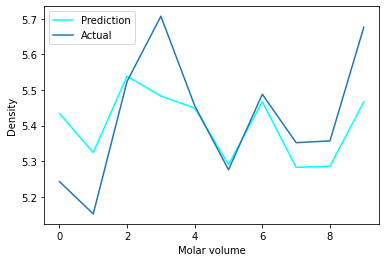

In [34]:
actual_test_trend=test_Y
plt.plot(pred_test, color='cyan', label='Prediction')
plt.plot(actual_test_trend, label='Actual')
plt.xlabel('Molar volume')
plt.ylabel('Density')
plt.legend()

In [40]:
differences = (1 - sum(abs(pred_test - actual_test_trend))/len(actual_test_trend)) * 100
pred_accuracy = differences.numpy()
pred_accuracy

array([90.058205], dtype=float32)